# Courses taught at MC

## Data import and munging

In [96]:
import pandas as pd
%matplotlib inline

#### Read from the web

In [16]:
# can be 'fl', 'sp', or 'su'
semester = 'fl'

# last two digits, starting in ??
year = '16'

url = 'http://w3.marietta.edu/~admincom/course.scheds/course.schedule.{}{}.html'.format(year, semester)

# this takes everything it finds in html tables and creates dataframes
rawlist = pd.read_html(url)

#### Combine the individual departments into a single big dataframe

In [18]:
deptdfs = []
for df in rawlist:
    if df.shape[1] == 12:
        deptdfs.append(df)
        
alldepts = pd.concat(deptdfs)

In [20]:
alldepts

,0,1,2,3,4,5,6,7,8,9,10,11
0,Synonym / Type,Course /Requisite,Sect,Description,Credit,Instructor(s),Status,Cap,Avail,Used,Wait,Books & Materials
1,36366,ACCT 201PRE,20,Intro to Mngt AcctRecommended Prerequisite:MSA...,3.0,"Depergola, Joseph S.",Open,45,7,38,0,NaN
2,36367,ACCT 202PRE,01,Intro. to Fin. Acct.Open to students who have ...,3.0,"Johnson, Grace F.",Open,30,17,13,0,NaN
3,35162,ACCT 301PRE,01,Interm. Acct. ITHMS 103 T/TH 09:30AM - 10:45AM,3.0,"Johnson, Grace F.",Open,24,8,16,0,NaN
4,35163,ACCT 302PRE,01,Interm. Acct. IITHMS 103 M/W/F 11:00AM - 11:50AM,3.0,"Ankrom, Douglas G.",Open,24,9,15,0,NaN
5,35164,ACCT 420,01,Federal Income TaxTHMS 110 M/W/F 08:00AM - 08:...,3.0,"Marra, Michele L.",Open,24,7,17,0,NaN
0,Synonym / Type,Course /Requisite,Sect,Description,Credit,Instructor(s),Status,Cap,Avail,Used,Wait,Books & Materials
1,35165R,ART 101,01,Drawing IHFAC 301A M/W 10:00AM - 11:50AMHFAC 3...,3.0,"Nash, Merri B.",Waitlist (Closed),11,-1,12,0,NaN
2,35166R,ART 101,02,Drawing IFF Only HFAC 301A M/W 10:00AM - 11:50...,3.0,"Nash, Merri B.",Waitlist (Closed),7,0,7,0,NaN
3,35167R,ART 101,03,Drawing IHFAC 301A T/TH 01:00PM - 02:50PMHFAC ...,3.0,"Nash, Merri B.",Waitlist (Closed),11,-1,12,0,NaN


#### Get rid of the duplicate label rows

In [24]:
alldepts = alldepts.drop_duplicates()
alldepts.shape

(582, 12)

#### Set the column labels

In [40]:
alldepts.columns = alldepts[0:1].values.astype(type('str'))[0]

In [41]:
alldepts.head(5)

,Synonym / Type,Course /Requisite,Sect,Description,Credit,Instructor(s),Status,Cap,Avail,Used,Wait,Books & Materials
0,Synonym / Type,Course /Requisite,Sect,Description,Credit,Instructor(s),Status,Cap,Avail,Used,Wait,Books & Materials
1,36366,ACCT 201PRE,20,Intro to Mngt AcctRecommended Prerequisite:MSA...,3.0,"Depergola, Joseph S.",Open,45,7,38,0,NaN
2,36367,ACCT 202PRE,01,Intro. to Fin. Acct.Open to students who have ...,3.0,"Johnson, Grace F.",Open,30,17,13,0,NaN
3,35162,ACCT 301PRE,01,Interm. Acct. ITHMS 103 T/TH 09:30AM - 10:45AM,3.0,"Johnson, Grace F.",Open,24,8,16,0,NaN
4,35163,ACCT 302PRE,01,Interm. Acct. IITHMS 103 M/W/F 11:00AM - 11:50AM,3.0,"Ankrom, Douglas G.",Open,24,9,15,0,NaN


#### Get rid of the last remaining label row

In [43]:
alldepts = alldepts.drop(0)

In [44]:
alldepts.head(5)

,Synonym / Type,Course /Requisite,Sect,Description,Credit,Instructor(s),Status,Cap,Avail,Used,Wait,Books & Materials
1,36366,ACCT 201PRE,20,Intro to Mngt AcctRecommended Prerequisite:MSA...,3.0,"Depergola, Joseph S.",Open,45,7,38,0,NaN
2,36367,ACCT 202PRE,01,Intro. to Fin. Acct.Open to students who have ...,3.0,"Johnson, Grace F.",Open,30,17,13,0,NaN
3,35162,ACCT 301PRE,01,Interm. Acct. ITHMS 103 T/TH 09:30AM - 10:45AM,3.0,"Johnson, Grace F.",Open,24,8,16,0,NaN
4,35163,ACCT 302PRE,01,Interm. Acct. IITHMS 103 M/W/F 11:00AM - 11:50AM,3.0,"Ankrom, Douglas G.",Open,24,9,15,0,NaN
5,35164,ACCT 420,01,Federal Income TaxTHMS 110 M/W/F 08:00AM - 08:...,3.0,"Marra, Michele L.",Open,24,7,17,0,NaN


#### Split cognate areas into their own column

Cognate areas show up as a letter at the end of the synonym. We can grab this with a regex.

In [51]:
import re

In [90]:
def split_synonym(row):
    thesyn = row['Synonym / Type']
    
    cognates = re.findall("[A-Z]", thesyn)
    
    return "".join(cognates)

alldepts['cognates'] = alldepts.apply(split_synonym, axis=1)

In [91]:
alldepts.head(7)

,Synonym / Type,Course /Requisite,Sect,Description,Credit,Instructor(s),Status,Cap,Avail,Used,Wait,Books & Materials,cognates
1,36366,ACCT 201PRE,20,Intro to Mngt AcctRecommended Prerequisite:MSA...,3.0,"Depergola, Joseph S.",Open,45,7,38,0,NaN,
2,36367,ACCT 202PRE,01,Intro. to Fin. Acct.Open to students who have ...,3.0,"Johnson, Grace F.",Open,30,17,13,0,NaN,
3,35162,ACCT 301PRE,01,Interm. Acct. ITHMS 103 T/TH 09:30AM - 10:45AM,3.0,"Johnson, Grace F.",Open,24,8,16,0,NaN,
4,35163,ACCT 302PRE,01,Interm. Acct. IITHMS 103 M/W/F 11:00AM - 11:50AM,3.0,"Ankrom, Douglas G.",Open,24,9,15,0,NaN,
5,35164,ACCT 420,01,Federal Income TaxTHMS 110 M/W/F 08:00AM - 08:...,3.0,"Marra, Michele L.",Open,24,7,17,0,NaN,
1,35165R,ART 101,01,Drawing IHFAC 301A M/W 10:00AM - 11:50AMHFAC 3...,3.0,"Nash, Merri B.",Waitlist (Closed),11,-1,12,0,NaN,R
2,35166R,ART 101,02,Drawing IFF Only HFAC 301A M/W 10:00AM - 11:50...,3.0,"Nash, Merri B.",Waitlist (Closed),7,0,7,0,NaN,R


#### Split the prefix, course number, and prerequisite flag into their own columns

In [107]:
def split_course(row, which=0):
    thecourse = row['Course /Requisite']
    pattern = "([A-Z]{3,4})\s([0-9]{3})(PRE)?"
    match = re.match(pattern, thecourse)
    
    return match.groups()[which]

In [113]:
alldepts['Prefix'] = alldepts.apply(split_course, axis=1, args=(0,))
alldepts['Number'] = alldepts.apply(split_course, axis=1, args=(1,))
alldepts['prereqs'] = alldepts.apply(split_course, axis=1, args=(2,))

In [114]:
alldepts.head(7)

,Synonym / Type,Course /Requisite,Sect,Description,Credit,Instructor(s),Status,Cap,Avail,Used,Wait,Books & Materials,cognates,Prefix,Number,prereqs
1,36366,ACCT 201PRE,20,Intro to Mngt AcctRecommended Prerequisite:MSA...,3.0,"Depergola, Joseph S.",Open,45,7,38,0,NaN,,ACCT,201,PRE
2,36367,ACCT 202PRE,01,Intro. to Fin. Acct.Open to students who have ...,3.0,"Johnson, Grace F.",Open,30,17,13,0,NaN,,ACCT,202,PRE
3,35162,ACCT 301PRE,01,Interm. Acct. ITHMS 103 T/TH 09:30AM - 10:45AM,3.0,"Johnson, Grace F.",Open,24,8,16,0,NaN,,ACCT,301,PRE
4,35163,ACCT 302PRE,01,Interm. Acct. IITHMS 103 M/W/F 11:00AM - 11:50AM,3.0,"Ankrom, Douglas G.",Open,24,9,15,0,NaN,,ACCT,302,PRE
5,35164,ACCT 420,01,Federal Income TaxTHMS 110 M/W/F 08:00AM - 08:...,3.0,"Marra, Michele L.",Open,24,7,17,0,NaN,,ACCT,420,None
1,35165R,ART 101,01,Drawing IHFAC 301A M/W 10:00AM - 11:50AMHFAC 3...,3.0,"Nash, Merri B.",Waitlist (Closed),11,-1,12,0,NaN,R,ART,101,None
2,35166R,ART 101,02,Drawing IFF Only HFAC 301A M/W 10:00AM - 11:50...,3.0,"Nash, Merri B.",Waitlist (Closed),7,0,7,0,NaN,R,ART,101,None


#### Build multi-index

In [116]:
alldepts = alldepts.set_index(['Prefix', 'Number', 'Sect'])

In [118]:
alldepts.head(7)

Synonym / Type Course /Requisite  \
Prefix Number Sect                                    
ACCT   201    20            36366       ACCT 201PRE   
       202    01            36367       ACCT 202PRE   
       301    01            35162       ACCT 301PRE   
       302    01            35163       ACCT 302PRE   
       420    01            35164          ACCT 420   
ART    101    01           35165R           ART 101   
              02           35166R           ART 101   

                                                          Description Credit  \
Prefix Number Sect                                                             
ACCT   201    20    Intro to Mngt AcctRecommended Prerequisite:MSA...    3.0   
       202    01    Intro. to Fin. Acct.Open to students who have ...    3.0   
       301    01       Interm. Acct. ITHMS 103 T/TH 09:30AM - 10:45AM    3.0   
       302    01     Interm. Acct. IITHMS 103 M/W/F 11:00AM - 11:50AM    3.0   
       420    01    Federal Income TaxTHMS 110 M/W/F 08:00AM - 08:...    3.0   
ART    101    01    Drawing IHFAC 301A M/W 10:00AM - 11:50AMHFAC 3...    3.0   
              02    Drawing IFF Only HFAC 301A M/W 10:00AM - 11:50...    3.0   

                           Instructor(s)             Status  Cap Avail  Used  \
Prefix Number Sect                                                             
ACCT   201    20    Depergola, Joseph S.               Open   45     7    38   
       202    01       Johnson, Grace F.               Open   30    17    13   
       301    01       Johnson, Grace F.               Open   24     8    16   
       302    01      Ankrom, Douglas G.               Open   24     9    15   
       420    01       Marra, Michele L.               Open   24     7    17   
ART    101    01          Nash, Merri B.  Waitlist (Closed)   11    -1    12   
              02          Nash, Merri B.  Waitlist (Closed)    7     0     7   

                   Wait Books & Materials cognates prereqs  
Prefix Number Sect                                          
ACCT   201    20      0               NaN              PRE  
       202    01      0               NaN              PRE  
       301    01      0               NaN              PRE  
       302    01      0               NaN              PRE  
       420    01      0               NaN             None  
ART    101    01      0               NaN        R    None  
              02      0               NaN        R    None

#### Make columns numeric

In [121]:
numeric_columns = ['Cap', 'Used', 'Avail', 'Wait', 'Credit']
for col in numeric_columns:
    alldepts[col] = pd.to_numeric(alldepts[col])


#### Drop unused columns

In [123]:
keepers = ['Description', 'Credit', 'Instructor(s)', 'Cap', 'Used', 'Avail', 'Wait', 'cognates', 'prereqs']
classdata = pd.DataFrame(alldepts, columns=keepers)

classdata.head(7)

Description  Credit  \
Prefix Number Sect                                                              
ACCT   201    20    Intro to Mngt AcctRecommended Prerequisite:MSA...     3.0   
       202    01    Intro. to Fin. Acct.Open to students who have ...     3.0   
       301    01       Interm. Acct. ITHMS 103 T/TH 09:30AM - 10:45AM     3.0   
       302    01     Interm. Acct. IITHMS 103 M/W/F 11:00AM - 11:50AM     3.0   
       420    01    Federal Income TaxTHMS 110 M/W/F 08:00AM - 08:...     3.0   
ART    101    01    Drawing IHFAC 301A M/W 10:00AM - 11:50AMHFAC 3...     3.0   
              02    Drawing IFF Only HFAC 301A M/W 10:00AM - 11:50...     3.0   

                           Instructor(s)  Cap  Used  Avail  Wait cognates  \
Prefix Number Sect                                                          
ACCT   201    20    Depergola, Joseph S.   45    38      7     0            
       202    01       Johnson, Grace F.   30    13     17     0            
       301    01       Johnson, Grace F.   24    16      8     0            
       302    01      Ankrom, Douglas G.   24    15      9     0            
       420    01       Marra, Michele L.   24    17      7     0            
ART    101    01          Nash, Merri B.   11    12     -1     0        R   
              02          Nash, Merri B.    7     7      0     0        R   

                   prereqs  
Prefix Number Sect          
ACCT   201    20       PRE  
       202    01       PRE  
       301    01       PRE  
       302    01       PRE  
       420    01      None  
ART    101    01      None  
              02      None

#### Serialize for use elsewhere

In [124]:
classdata.to_pickle('classes.pkl')

## Questions:

### Distribution of class size

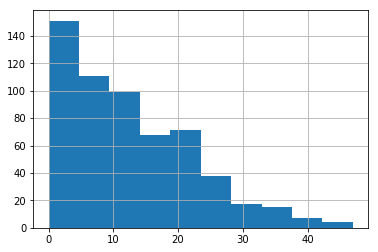

In [99]:
alldepts['Used'].hist()

### Number of seats available in each gen ed cognate area

### How full are classes

#### By prefix

#### By cognate

#### By cap

### Scheduling Questions